1 Feature

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f693f006050> (for post_execute):


ValueError: ignored

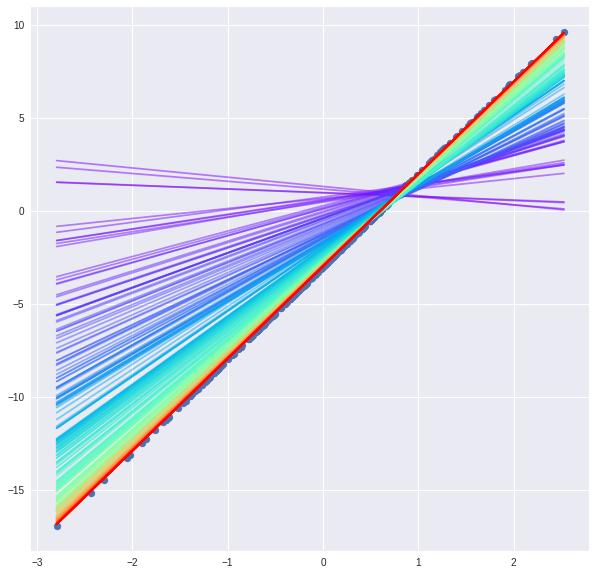

ValueError: ignored

<Figure size 1440x720 with 2 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

# set params
N=300 # 개수가 300개
lr = 0.01
t_w,t_b = 5,-3 # 타겟 w,b
w,b = np.random.uniform(-3,3,2) # 학습시킬 w,b

# generate dataset
x_data = np.random.randn(N,) # input
y_data = x_data*t_w + t_b # affine function

# visualize dataset
cmap = cm.get_cmap('rainbow',lut=N)
fig,ax= plt.subplots(figsize=(10,10))
ax.scatter(x_data,y_data)

x_range = np.array([x_data.min(),x_data.max()])
w_track, b_track  = list(),list()
J_track = list()

# train model and visualize updated models
for data_idx, (x,y) in enumerate(zip(x_data,y_data)):

  w_track.append(w) # w 변화 확인
  b_track.append(b) # b 변화 확인

  # visualize update model
  y_range = w*x_range + b
  ax.plot(x_range, y_range, color=cmap(data_idx),alpha=0.5)

  # forward propagation
  pred = x*w + b
  J = (y-pred)**2
  J_track.append(J) # loss 변화 확인

  # jacobians
  dJ_dpred = -2*(y-pred)
  dpred_dw = x
  dpred_db = 1

  # backpropagation
  dJ_dw=dJ_dpred*dpred_dw
  dJ_db=dJ_dpred*dpred_db

  # parameter update
  w = w-lr*dJ_dw
  b = b-lr*dJ_db

# visualize results
fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track) # 보라색 부터 계속 학습
axes[1].plot(w_track, color='darked')
axes[1].plot(b_track, color='darkblue')

axes[0].set_ylabel('MSE',fontsize=30)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w,color='darked',linestyle=':')
axes[1].axhline(y=t_b,color='darkblue',linestyle=':')
axes[1].tick_params(labelsize=20)